In [ ]:
#Link : https://www.kaggle.com/datasets/shayalvaghasiya/ddos-sdn?resource=download

# dt: Generalmente representa la marca de tiempo (datetime) en que ocurrió el evento o captura del dato.
# switch: Puede referirse al identificador del switch de red donde se capturó el paquete o flujo.
# src: Dirección IP de origen (source IP).
# dst: Dirección IP de destino (destination IP).
# pktcount: Número total de paquetes en un flujo o intervalo de tiempo.
# bytecount: Número total de bytes transferidos en ese flujo o intervalo.
# dur: Duración del flujo o sesión en segundos (o la unidad de tiempo que uses).
# dur_nsec: Duración con mayor precisión en nanosegundos (parte fraccionaria de dur).
# tot_dur: Duración total acumulada o alguna duración combinada de múltiples flujos o sesiones.
# flows: Cantidad de flujos en un intervalo o segmento de tiempo.
# packetins: Paquetes entrantes (inbound packets).
# pktperflow: Promedio de paquetes por flujo (packet count / number of flows).
# byteperflow: Promedio de bytes por flujo (byte count / number of flows).
# pktrate: Tasa de paquetes, puede ser paquetes por segundo u otra unidad de tiempo.
# Pairflow: Probablemente representa un identificador de flujo par (bidireccional), por ejemplo combinación src-dst y dst-src.
# Protocol: Protocolo de transporte o red usado (TCP, UDP, ICMP, etc.).
# port_no: Número de puerto asociado (generalmente el puerto de destino o fuente).
# tx_bytes: Bytes transmitidos (transmitted bytes).
# rx_bytes: Bytes recibidos (received bytes).
# tx_kbps: Kilobits por segundo transmitidos (tasa de transmisión).
# rx_kbps: Kilobits por segundo recibidos (tasa de recepción).
# A1 y A2: Podrían ser atributos adicionales específicos de tu dataset, como indicadores de tipo de flujo, estado, o categorías asignadas (pueden ser etiquetas o métricas personalizadas).
# tot_kbps: Total de kilobits por segundo (tx_kbps + rx_kbps).
# label: Etiqueta o clase para clasificación, por ejemplo si el flujo es benigno o malicioso (útil en aprendizaje automático).


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('dataset_sdn_Attack.csv')


dataset

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,label
0,11335,1,167772161,167772168,4777,5092282,10,711000000,1.071100e+10,3,...,1,2,3753,1332,0,0.0,0,0,0.0,1
1,11335,1,167772161,167772168,4777,5092282,10,711000000,1.071100e+10,3,...,1,3,3679,58460931,0,5232.0,0,0,5232.0,1
2,11335,1,167772161,167772168,4777,5092282,10,711000000,1.071100e+10,3,...,1,2,3733,1402,0,0.0,0,0,0.0,1
3,11335,1,167772161,167772168,4777,5092282,10,711000000,1.071100e+10,3,...,1,4,58460931,3749,5232,0.0,0,0,5232.0,1
4,11335,1,167772161,167772168,4777,5092282,10,711000000,1.071100e+10,3,...,1,3,3413,3623,0,0.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40779,6552,4,167772169,167772166,129558,134999436,448,981000000,4.490000e+11,7,...,64,2,105767,135561984,0,0.0,0,0,0.0,1
40780,6552,4,167772169,167772166,129558,134999436,448,981000000,4.490000e+11,7,...,64,5,406600633,135491541,822,822.0,0,0,1644.0,1
40781,6552,3,167772166,167772169,129986,135445412,451,235000000,4.510000e+11,6,...,64,1,271228089,271126588,0,0.0,0,0,0.0,1
40782,6552,3,167772166,167772169,129986,135445412,451,235000000,4.510000e+11,6,...,64,2,135482179,406500239,1,822.0,0,0,823.0,1


In [ ]:
protocol = dataset['Protocol'].to_numpy()
flows = dataset['flows'].to_numpy()

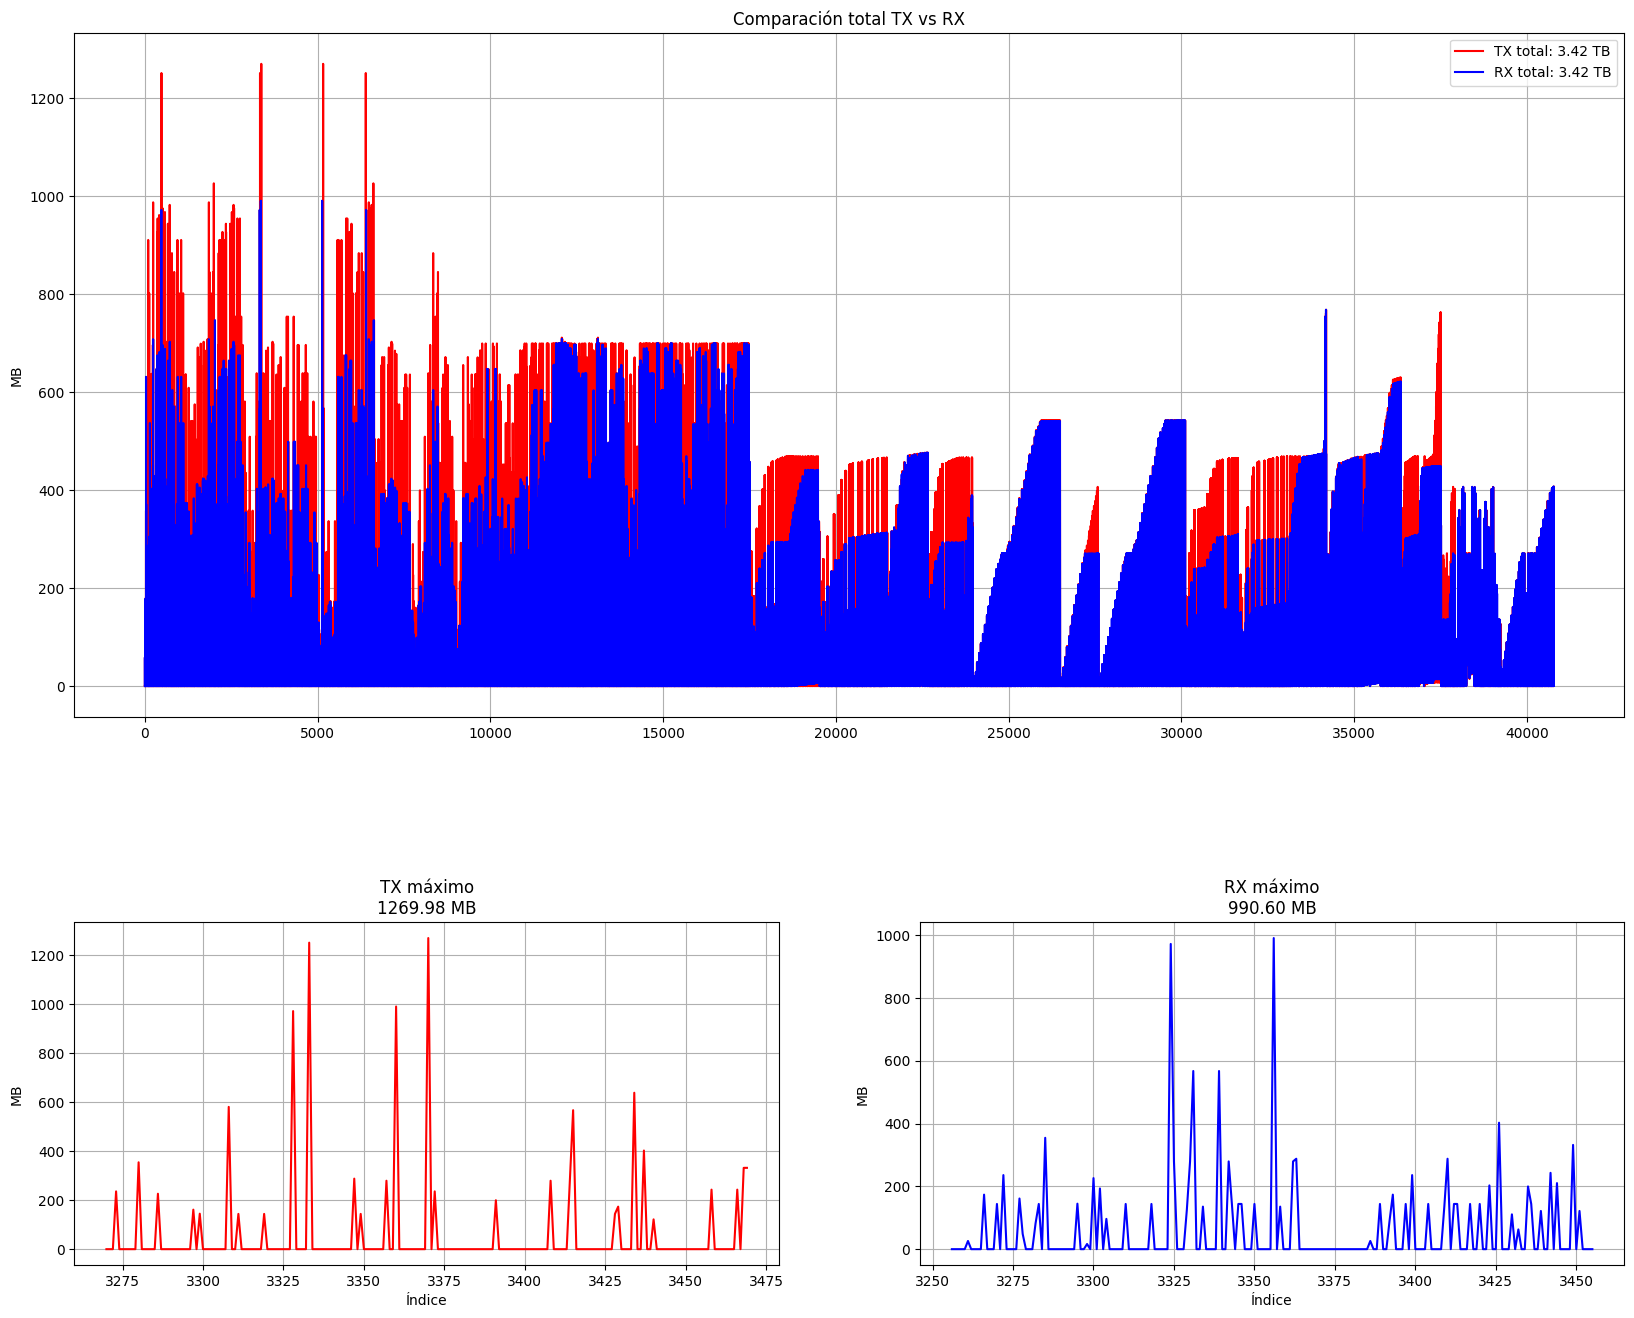

In [ ]:
from matplotlib.gridspec import GridSpec
rx_bytes = dataset['rx_bytes'].to_numpy()
tx_bytes = dataset['tx_bytes'].to_numpy()

tx = tx_bytes / 1_000_000
rx = rx_bytes / 1_000_000

def get_window(datos, indice_central, tamaño_ventana=200):
    mitad_ventana = tamaño_ventana // 2
    inicio = np.clip(indice_central - mitad_ventana, 0, datos.size)
    fin = np.clip(indice_central + mitad_ventana, 0, datos.size)
    return np.arange(inicio, fin), datos[inicio:fin]

fig = plt.figure(figsize=(20, 16))
grid = GridSpec(2, 2, height_ratios=[2, 1], hspace=0.4)

grafico_principal = fig.add_subplot(grid[0, :])

for data_array, color, label in zip([tx, rx], ['r', 'b'], ['TX', 'RX']):
    grafico_principal.plot(data_array, color, label=f'{label} total: {data_array.sum()/1_000_000:.2f} TB')

grafico_principal.set(title='Comparación total TX vs RX', ylabel='MB')
grafico_principal.legend()
grafico_principal.grid()

for columna, (data_array, color, label) in enumerate(zip([tx, rx], ['r', 'b'], ['TX', 'RX'])):
    indice_maximo = np.argmax(data_array)
    indices_ventana, valores_ventana = get_window(data_array, indice_maximo)
    ax = fig.add_subplot(grid[1, columna])
    ax.plot(indices_ventana, valores_ventana, color)
    ax.set(title=f'{label} máximo\n{valores_ventana.max():.2f} MB', xlabel='Índice', ylabel='MB')
    ax.grid()

plt.show()





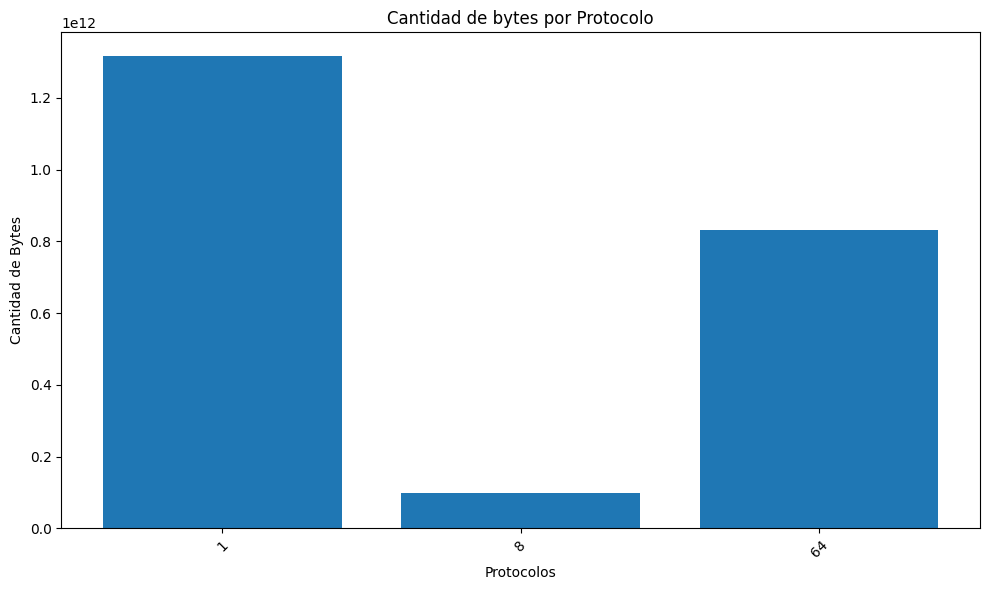

In [ ]:
protocols = dataset['Protocol'].to_numpy()
bytecount = dataset['bytecount'].to_numpy()

# Obtener los protocolos únicos y el índice inverso
unique_protocols, inv = np.unique(protocols, return_inverse=True)

# Sumar los bytecounts por protocolo
byte_sums = np.bincount(inv, weights=bytecount)

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(unique_protocols.astype(str), byte_sums)
plt.xlabel("Protocolos")
plt.ylabel("Cantidad de Bytes")
plt.title("Cantidad de bytes por Protocolo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


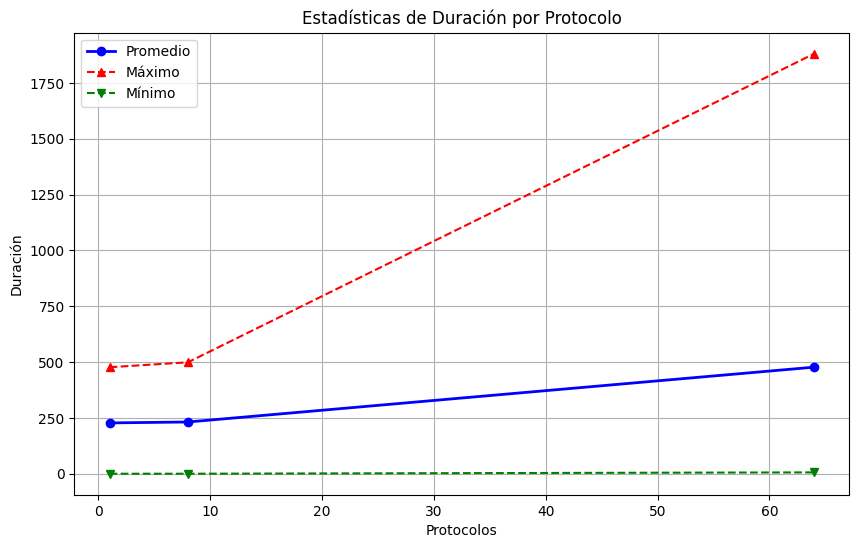

In [ ]:
# 1) Extraer columnas relevantes y convertirlas a arrays de NumPy
protocols = dataset['Protocol'].to_numpy()
durations = dataset['dur'].to_numpy()

unique_protocols = np.unique(protocols)

means = np.array([durations[protocols == p].mean() for p in unique_protocols])
maxs  = np.array([durations[protocols == p].max() for p in unique_protocols])
mins  = np.array([durations[protocols == p].min() for p in unique_protocols])

#  Crear el gráfico
plt.figure(figsize=(10, 6))

# Dibujar líneas: promedio, máximo y mínimo
plt.plot(unique_protocols, means, marker='o', color='blue', linewidth=2, label='Promedio')
plt.plot(unique_protocols, maxs, marker='^', color='red', linestyle='--', label='Máximo')
plt.plot(unique_protocols, mins, marker='v', color='green', linestyle='--', label='Mínimo')

#  Agregar etiquetas y título
plt.xlabel('Protocolos')
plt.ylabel('Duración')
plt.title('Estadísticas de Duración por Protocolo')

#  Leyenda y cuadrícula
plt.legend()            # muestra los nombres de cada línea
plt.grid(True)          # añade líneas de fondo para leer mejor los valores

# Mostrar el gráfico
plt.show()


/tmp/ipython-input-997843003.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = plt.scatter(dst, src, cmap='viridis', alpha=0.7)


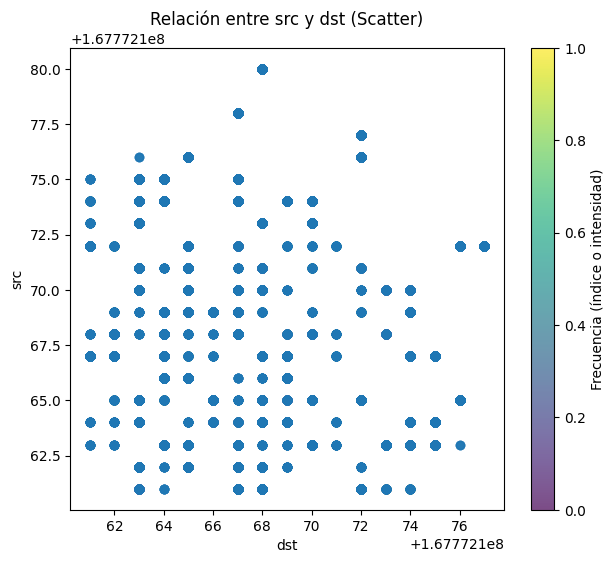

In [ ]:
dst = np.array(dataset["dst"])
src = np.array(dataset["src"])
# Cada punto representa una combinación (dst, src)
# alpha=0.7 hace los puntos semitransparentes (útil si hay muchos)
plt.figure(figsize=(7, 6))

# Gráfico de dispersión con NumPy arrays
sc = plt.scatter(dst, src, cmap='viridis', alpha=0.7)

plt.title("Relación entre src y dst (Scatter)")
plt.xlabel("dst")
plt.ylabel("src")

# Agregar colorbar (usando el argumento 'c' para tener una escala de color)
plt.colorbar(sc, label="Frecuencia (índice o intensidad)")

plt.show()

/tmp/ipython-input-3045883040.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis")   # elegir paleta de colores


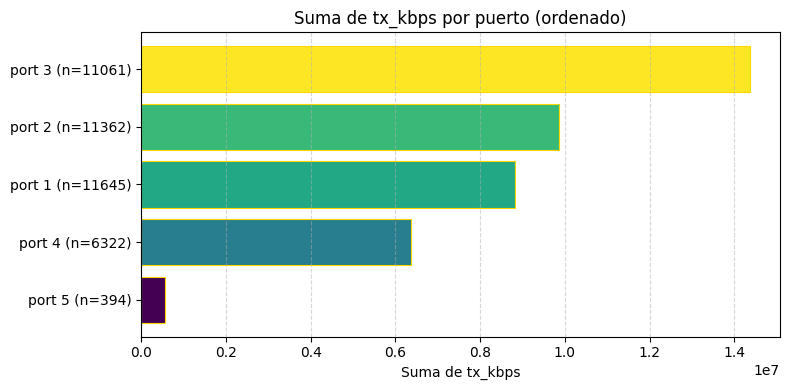

In [ ]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm  # para usar mapas de colores

# ---- Requisitos previos ----
# dataset : un DataFrame (por ejemplo de pandas)
#           que contenga las columnas 'port_no' y 'tx_kbps'
# ---------------------------------------------

# 1) Extraer columnas
ports = dataset['port_no'].astype(int)   # columna de puertos (convertir a enteros)
tx = dataset['tx_kbps']                  # columna de tráfico (float o numérica)

# 2) Quitar valores NaN (faltantes)
mask = ~np.isnan(ports) & ~np.isnan(tx)  # True donde ambos son válidos
ports = ports[mask]
tx = tx[mask]

# 3) Obtener puertos únicos y los índices inversos
# np.unique devuelve los valores únicos y 'inverse' indica a qué grupo pertenece cada elemento original
unique_ports, inverse = np.unique(ports, return_inverse=True)

# 4) Inicializar arrays para guardar la suma y el conteo por puerto
sums = np.zeros_like(unique_ports, dtype=float)
counts = np.zeros_like(unique_ports, dtype=int)

# 5) Acumular tx_kbps por cada puerto
for i, inv in enumerate(inverse):
    sums[inv] += tx[i]    # sumar tráfico al puerto correspondiente
    counts[inv] += 1      # contar cuántas veces aparece ese puerto

# 6) Ordenar por suma total (de mayor a menor)
order = np.argsort(sums)[::-1]  # [::-1] invierte el orden (descendente)
unique_ports = unique_ports[order]
sums = sums[order]
counts = counts[order]

# 7) Normalizar valores para asignar colores en degradado
norm = (sums - sums.min()) / (sums.max() - sums.min() + 1e-12)
cmap = cm.get_cmap("viridis")   # elegir paleta de colores
colors = cmap(norm)             # obtener color según valor normalizado

# === 8) Graficar ===
plt.figure(figsize=(8, max(4, 0.12 * len(unique_ports))))  # alto dinámico según cantidad de puertos
y_pos = np.arange(len(unique_ports))  # posiciones en eje Y

plt.barh(y_pos, sums, color=colors, edgecolor='gold', linewidth=0.8)
plt.yticks(y_pos, [f"port {p} (n={c})" for p, c in zip(unique_ports, counts)])  # etiquetas con puerto y cantidad
plt.xlabel("Suma de tx_kbps")
plt.title("Suma de tx_kbps por puerto (ordenado)")
plt.gca().invert_yaxis()  # poner el puerto con más tráfico arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# 1) Seleccionar varias columnas y convertirlas a un array NumPy
mat = dataset[['pktcount', 'bytecount', 'tx_kbps', 'rx_kbps']].to_numpy()

# 2) Calcular la transpuesta del array
# np.transpose cambia filas por columnas
mat_T = np.transpose(mat)

# 3) Mostrar información básica sobre el resultado
print("[1] Transposición de columnas seleccionadas:")
print("Forma original:", mat.shape)       # muestra filas y columnas originales
print("Forma transpuesta:", mat_T.shape)  # muestra filas y columnas después de transponer
print("Primeras 2 filas transpuestas:\n", mat_T[:2])  # muestra 2 primeras filas del array transpuesto
print("-" * 60)                           # separador visual


[1] Transposición de columnas seleccionadas:
Forma original: (40784, 4)
Forma transpuesta: (4, 40784)
Primeras 2 filas transpuestas:
 [[4.77700000e+03 4.77700000e+03 4.77700000e+03 ... 1.29986000e+05
  1.29986000e+05 1.29986000e+05]
 [5.09228200e+06 5.09228200e+06 5.09228200e+06 ... 1.35445412e+08
  1.35445412e+08 1.35445412e+08]]
------------------------------------------------------------


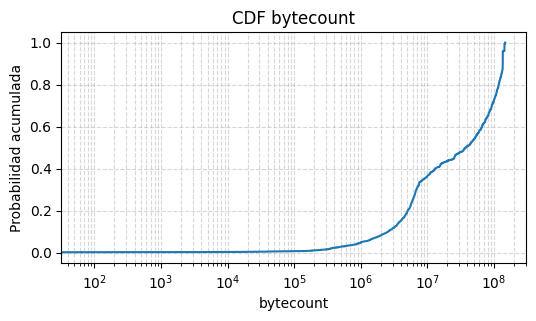

In [ ]:
# 1) Convertir la columna 'bytecount' a un array NumPy
vals = dataset['bytecount'].to_numpy()

# 2) Ordenar los valores de menor a mayor
s = np.sort(vals)

# 3) Crear los valores del eje Y para la CDF
# np.arange(1, len(s)+1) → genera una secuencia [1, 2, 3, ..., N]
# al dividir entre len(s), los resultados van de 0 a 1 (proporción acumulada)
cdf = np.arange(1, len(s) + 1) / len(s)

# 4) Graficar la CDF
plt.figure(figsize=(6, 3))      # tamaño del gráfico (ancho=6, alto=3)
plt.plot(s, cdf)                # traza la curva CDF (X=s, Y=cdf)
plt.xscale('log')               # escala logarítmica en el eje X (útil para datos grandes)
plt.title('CDF bytecount')      # título del gráfico
plt.xlabel('bytecount')         # etiqueta del eje X
plt.ylabel('Probabilidad acumulada')  # etiqueta del eje Y
plt.grid(True, which="both", ls="--", alpha=0.5)  # (opcional) agrega una cuadrícula
plt.show()                      # muestra el gráfico en pantalla



In [ ]:
# 1) Crear un orden basado en la columna 'dt'
# np.argsort devuelve los índices que ordenarían el array 'dt' de menor a mayor
order = np.argsort(dataset['dt'].to_numpy())

# 2) Reordenar la columna 'dur' según ese orden
# Esto asegura que los valores de 'dur' queden alineados temporalmente por 'dt'
dur_sorted = dataset['dur'].to_numpy()[order]

# 3) Calcular las diferencias sucesivas entre elementos contiguos
# np.diff calcula (x[i+1] - x[i]) para todo el array
dur_diff = np.diff(dur_sorted)

# 4) Mostrar los primeros 5 resultados para revisar
print("[8] Primeras 5 diferencias sucesivas de dur (ordenadas por dt):")
print(dur_diff[:5])  # imprime las primeras 5 diferencias
print("-" * 60)      # separador visual


[8] Primeras 5 diferencias sucesivas de dur (ordenadas por dt):
[0 0 0 0 0]
------------------------------------------------------------


In [ ]:
# 1) Extraer la columna 'pktcount' como array de NumPy y reordenarla según 'order'
pkt_sorted = dataset['pktcount'].to_numpy()[order]

# 2) Calcular la suma acumulada del array reordenado
pkt_cum = np.cumsum(pkt_sorted)

# 3) Mostrar resultados útiles (primeros 5 valores y último acumulado)
print("[9] Primeras 5 sumas acumuladas de pktcount (ordenadas por dt):")
print(pkt_cum[:5])           # muestra los primeros 5 elementos
print("Último valor acumulado:", pkt_cum[-1])  # muestra el total acumulado final
print("-" * 60)              # línea separadora para legibilidad


[9] Primeras 5 sumas acumuladas de pktcount (ordenadas por dt):
[11905 23810 35715 47620 59525]
Último valor acumulado: 3220385142
------------------------------------------------------------
